In [2]:
import diplib

from IPython.display import Video
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
src = './homework2/driveway1.mp4'
dest = './homework2/driveway1-detected.mp4'
frames = diplib.get_video_frames(src)

In [4]:
seg_frames = frames[:500]

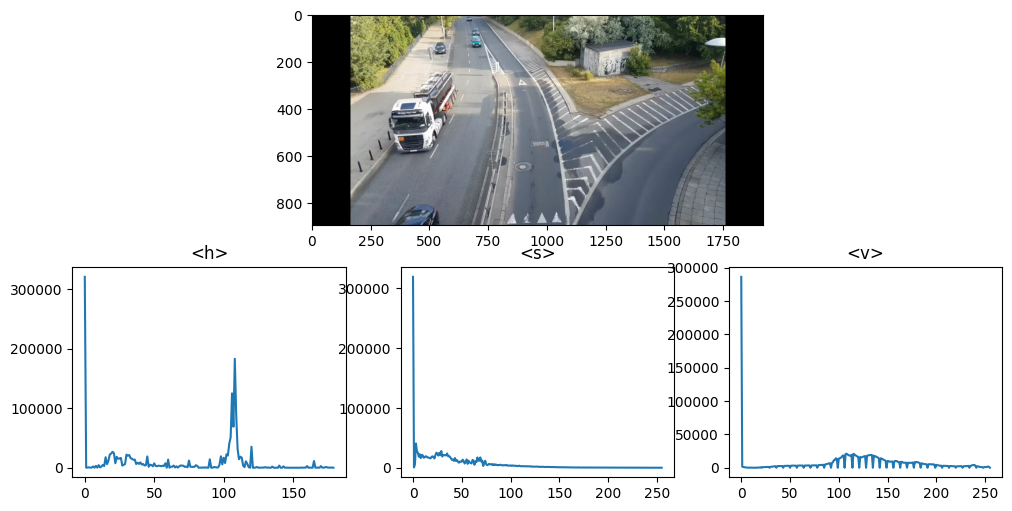

In [5]:
img = seg_frames[30]
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))

hist_h = cv2.calcHist([hsv], [0], None, [180], [0, 179])
plt.subplot(2, 3, 4)
plt.plot(hist_h)
plt.title('<h>')

hist_s = cv2.calcHist([hsv], [1], None, [256], [0, 255])
plt.subplot(2, 3, 5)
plt.plot(hist_s)
plt.title('<s>')

hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 255])
plt.subplot(2, 3, 6)
plt.plot(hist_v)
plt.title('<v>')

plt.show()

In [6]:
# Get median image
median = np.median(seg_frames, axis=0)

In [7]:
# Get average image & gray image
filtered_frames = np.empty_like(seg_frames[:,:,:,0], dtype='float64')
avg = np.zeros_like(seg_frames[0,:,:,0], dtype='float64')
for idx, frame in enumerate(seg_frames):
    filtered_frames[idx] = cv2.cvtColor(frame.copy(), cv2.COLOR_RGB2GRAY)
    avg += filtered_frames[idx]
avg /= len(avg)

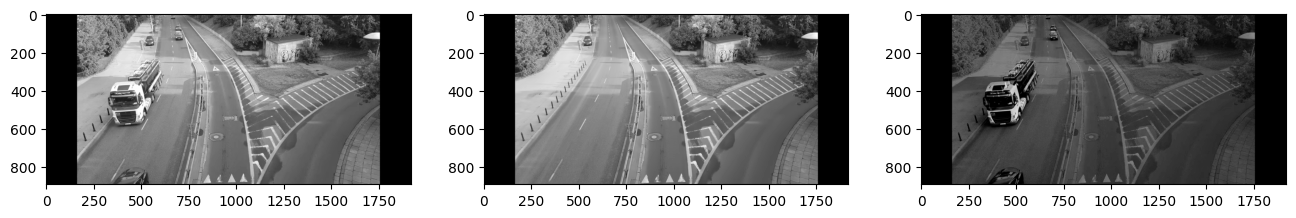

In [8]:
plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plt.imshow(filtered_frames[30], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(avg, cmap='gray')
plt.subplot(1, 3, 3)
amount = 1
result_frame = filtered_frames[30] - amount*avg
result_frame[filtered_frames[30] < amount*avg] = 0
plt.imshow(result_frame, cmap='gray')
plt.show()

In [16]:
seg_frames.dtype

dtype('uint8')

In [17]:
subtracted_frames = np.empty_like(seg_frames)
for idx, frame in enumerate(seg_frames):
    subtracted_frames[idx] = cv2.absdiff(frame, median.astype('uint8'))

diplib.export_video(dest, subtracted_frames)
Video(dest)